In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '15597618-71e6-421e-9f79-647a21e40c4a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2023-09-22T17:24:40.471Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9126}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10476, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [3]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now', utc = True)

In [4]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949290e+07,1.949290e+07,False,NaN,1,NaN,NaN,None,2023-09-22T17:23:00.000Z,26598.679148,1.029414e+10,-33.5232,-0.125070,-0.143526,0.943257,0.307427,-8.628703,-13.083999,5.184854e+11,49.1911,5.585723e+11,None,2023-09-22T17:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:24:47.245070+00:00
1,1027,Ethereum,ETH,ethereum,7423,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202281e+08,1.202281e+08,True,NaN,2,NaN,NaN,None,2023-09-22T17:23:00.000Z,1589.852849,3.486968e+09,-42.0226,-0.221416,-0.070304,-1.924430,-5.797166,-13.787152,-15.560886,1.911450e+11,18.1359,1.911450e+11,None,2023-09-22T17:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:24:47.245070+00:00
2,825,Tether USDt,USDT,tether,62697,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.319102e+10,8.642620e+10,True,NaN,3,NaN,NaN,None,2023-09-22T17:23:00.000Z,1.000045,1.625545e+10,-32.2436,-0.004628,0.011582,-0.001103,0.029055,0.006331,-0.044692,8.319475e+10,7.8944,8.643008e+10,None,2023-09-22T17:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-22 17:24:47.245070+00:00
3,1839,BNB,BNB,bnb,1633,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538476e+08,1.538476e+08,False,NaN,4,NaN,NaN,None,2023-09-22T17:23:00.000Z,210.193522,2.723513e+08,-40.1215,-0.243156,-0.408550,-1.055253,-3.590842,-11.471506,-10.485118,3.233777e+10,3.0685,3.233777e+10,None,2023-09-22T17:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:24:47.245070+00:00
4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,None,2023-09-22T17:23:00.000Z,0.513048,7.052936e+08,-32.3459,0.398613,1.100754,3.591180,-3.775926,-26.550015,5.386678,2.731738e+10,2.5922,5.130483e+10,None,2023-09-22T17:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:24:47.245070+00:00
5,3408,USD Coin,USDC,usd-coin,14194,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.577107e+10,2.577107e+10,False,NaN,6,NaN,NaN,None,2023-09-22T17:23:00.000Z,1.000040,2.562439e+09,-25.4710,-0.020950,0.013524,-0.008527,0.001397,-0.012950,0.009853,2.577210e+10,2.4453,2.577210e+10,None,2023-09-22T17:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-22 17:24:47.245070+00:00
6,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411133e+11,1.411133e+11,True,NaN,7,NaN,NaN,None,2023-09-22T17:23:00.000Z,0.061338,1.520420e+08,-36.0993,-0.301970,-0.534979,-1.103797,-4.766555,-17.311226,-7.627827,8.655583e+09,0.8212,8.655583e+09,None,2023-09-22T17:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:24:47.245070+00:00
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.511840e+10,3.618323e+10,False,NaN,8,NaN,NaN,None,2023-09-22T17:23:00.000Z,0.243537,1.172128e+08,-5.9907,-0.433880,-2.046530,-1.599048,-9.071221,-19.550742,-15.199219,8.552617e+09,0.8115,1.095915e+10,None,2023-09-22T17:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:24:47.245070+00:00
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:

In [5]:
# creating the function 

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '15597618-71e6-421e-9f79-647a21e40c4a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    import pandas as pd

    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)

    df = pd.json_normalize(data['data'])

    df['timestamp'] = pd.to_datetime('now', utc = True)
    
    #df
    
    if not os.path.isfile(r'C:\Users\hp\Documents\API_crypto\api_crypto.csv'):
        df.to_csv(r'C:\Users\hp\Documents\API_crypto\api_crypto.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\hp\Documents\API_crypto\api_crypto.csv', mode = 'a', header = False)

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949290e+07,1.949290e+07,False,NaN,1,NaN,NaN,None,2023-09-22T17:09:00.000Z,26600.522863,1.033966e+10,-33.2267,-0.076324,-0.121701,0.912035,0.576599,-8.523158,-13.055606,5.185213e+11,49.2057,5.586110e+11,None,2023-09-22T17:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:11:54.980850+00:00
1,1027,Ethereum,ETH,ethereum,7423,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202281e+08,1.202281e+08,True,NaN,2,NaN,NaN,None,2023-09-22T17:09:00.000Z,1589.702161,3.510563e+09,-41.4618,-0.186306,0.027790,-1.959544,-5.644206,-13.749257,-15.457927,1.911269e+11,18.1309,1.911269e+11,None,2023-09-22T17:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:11:54.980850+00:00
2,825,Tether USDt,USDT,tether,62697,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.319102e+10,8.642620e+10,True,NaN,3,NaN,NaN,None,2023-09-22T17:09:00.000Z,1.000024,1.632484e+10,-31.8647,0.000490,0.015340,-0.017144,0.051294,0.020135,-0.046623,8.319305e+10,7.8927,8.642832e+10,None,2023-09-22T17:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-22 17:11:54.980850+00:00
3,1839,BNB,BNB,bnb,1633,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538476e+08,1.538476e+08,False,NaN,4,NaN,NaN,None,2023-09-22T17:09:00.000Z,210.244235,2.735869e+08,-39.8015,-0.207513,-0.276280,-1.014123,-3.346649,-11.422032,-10.433900,3.234557e+10,3.0687,3.234557e+10,None,2023-09-22T17:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:11:54.980850+00:00
4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,None,2023-09-22T17:09:00.000Z,0.511131,7.028606e+08,-32.0726,-0.030340,1.029908,3.356804,-3.565255,-26.816861,4.882093,2.721527e+10,2.5820,5.111306e+10,None,2023-09-22T17:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:11:54.980850+00:00
5,3408,USD Coin,USDC,usd-coin,14194,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.577107e+10,2.577107e+10,False,NaN,6,NaN,NaN,None,2023-09-22T17:09:00.000Z,1.000044,2.572566e+09,-25.0272,-0.009160,0.010204,-0.021615,0.004236,-0.002119,0.005156,2.577220e+10,2.4448,2.577220e+10,None,2023-09-22T17:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-22 17:11:54.980850+00:00
6,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411133e+11,1.411133e+11,True,NaN,7,NaN,NaN,None,2023-09-22T17:09:00.000Z,0.061368,1.516635e+08,-36.1791,-0.226903,-0.360145,-0.998071,-4.613327,-17.161303,-7.701975,8.659826e+09,0.8218,8.659826e+09,None,2023-09-22T17:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:11:54.980850+00:00
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.511840e+10,3.618323e+10,False,NaN,8,NaN,NaN,None,2023-09-22T17:09:00.000Z,0.243712,1.167780e+08,-6.0236,-0.396688,-1.775974,-1.585910,-8.554311,-19.498012,-15.485135,8.558780e+09,0.8119,1.096705e+10,None,2023-09-22T17:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:11:54.980850+00:00
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:0

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    #print(i)
    api_runner()
    print("Api runner completed")
    sleep(60)
exit()


Api runner completed
Api runner completed
Api runner completed
Api runner completed


KeyboardInterrupt: 

In [16]:
df2 = pd.read_csv(r'C:\Users\hp\Documents\API_crypto\api_crypto.csv')
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10465,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.948512e+07,1.948512e+07,False,NaN,1,NaN,NaN,NaN,2023-09-14T12:40:00.000Z,26428.863178,1.296778e+10,-14.7306,0.194018,1.113064,3.018181,-9.889764,-12.824369,3.572405,5.149697e+11,49.2237,5.550061e+11,NaN,2023-09-14T12:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-14 12:41:26.167382+00:00
1,1,1027,Ethereum,ETH,ethereum,7381,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202226e+08,1.202226e+08,True,NaN,2,NaN,NaN,NaN,2023-09-14T12:40:00.000Z,1621.784110,5.151261e+09,-4.7932,-0.104409,1.539366,-0.248588,-11.837855,-16.110914,-2.634654,1.949751e+11,18.6261,1.949751e+11,NaN,2023-09-14T12:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-14 12:41:26.167382+00:00
2,2,825,Tether USDt,USDT,tether,62245,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.303472e+10,8.543720e+10,True,NaN,3,NaN,NaN,NaN,2023-09-14T12:40:00.000Z,1.000155,2.011206e+10,-11.2650,0.008125,0.022060,0.068066,0.155082,-0.041210,0.125560,8.304759e+10,7.9369,8.545044e+10,NaN,2023-09-14T12:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-14 12:41:26.167382+00:00
3,3,1839,BNB,BNB,bnb,1621,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538487e+08,1.538487e+08,False,NaN,4,NaN,NaN,NaN,2023-09-14T12:40:00.000Z,212.069211,3.331444e+08,-8.9213,-0.207403,0.242442,-0.770076,-11.203405,-15.226324,-9.667843,3.262658e+10,3.1168,3.262658e+10,NaN,2023-09-14T12:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-14 12:41:26.167382+00:00
4,4,3408,USD Coin,USDC,usd-coin,14076,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.618315e+10,2.618315e+10,False,NaN,5,NaN,NaN,NaN,2023-09-14T12:40:00.000Z,1.000266,3.162760e+09,-9.6879,0.007986,0.023232,0.020456,0.027220,0.001940,0.026995,2.619011e+10,2.5030,2.619011e+10,NaN,2023-09-14T12:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-14 12:41:26.167382+00:00
5,5,52,XRP,XRP,xrp,1082,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.308305e+10,9.998844e+10,False,NaN,6,NaN,NaN,NaN,2023-09-14T12:40:00.000Z,0.482985,7.485273e+08,-22.8258,0.130792,0.490574,-3.084472,-22.832765,-35.265839,3.504815,2.563832e+10,2.4503,4.829851e+10,NaN,2023-09-14T12:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-14 12:41:26.167382+00:00
6,6,2010,Cardano,ADA,cardano,933,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.509817e+10,3.616798e+10,False,NaN,7,NaN,NaN,NaN,2023-09-14T12:40:00.000Z,0.248652,9.652288e+07,-18.0390,-0.081772,0.232059,-1.999685,-13.915939,-22.785212,-3.613027,8.727222e+09,0.8342,1.118933e+10,NaN,2023-09-14T12:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-14 12:41:26.167382+00:00
7,7,74,Dogecoin,DOGE,dogecoin,796,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.410036e+11,1.410036e+11,True,NaN,8,NaN,NaN,NaN,2023-09-14T12:40:00.000Z,0.061498,1.749716e+08,-12.4091,-0.090185,0.597360,-2.282937,-16.968856,-13.987553,0.097640,8.671395e+09,0.8287,8.671395e+09,NaN,2023-09-14T12:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-14 12:41:26.167382+00:00
8,8,5426,Solana,SOL,solana,522,2020-04-10T00:0

In [ ]:
pd.set_option('display.float_format' , lambda x: '%.5f' %x)


In [ ]:
df2

In [9]:
df3 = df.groupby('name')[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
BNB,-0.350442,-0.474193,-1.099760,-3.604145,-11.578228,-10.686326
Bitcoin,-0.230692,-0.241067,0.850987,0.231398,-8.704459,-13.299920
Cardano,-0.490524,-2.056803,-1.598453,-9.004611,-19.660189,-15.336791
Dai,-0.035297,-0.062228,-0.089324,-0.128878,-0.014461,-0.084119
Dogecoin,-0.349873,-0.565404,-1.142738,-4.664978,-17.460346,-7.819780
Ethereum,-0.353256,-0.197891,-2.046734,-5.835763,-13.890620,-15.757400
Litecoin,-0.523326,-0.786420,-0.523365,-3.244702,-27.780832,-27.456011
Polkadot,-0.308847,-0.864303,-2.718431,-11.242772,-23.326743,-19.863179
Polygon,-0.252377,-1.664584,-0.293087,-8.030164,-28.228890,-21.639731


In [10]:
df4 = df3.stack()
df4

name                                     
BNB          quote.USD.percent_change_1h     -0.350442
             quote.USD.percent_change_24h    -0.474193
             quote.USD.percent_change_7d     -1.099760
             quote.USD.percent_change_30d    -3.604145
             quote.USD.percent_change_60d   -11.578228
             quote.USD.percent_change_90d   -10.686326
Bitcoin      quote.USD.percent_change_1h     -0.230692
             quote.USD.percent_change_24h    -0.241067
             quote.USD.percent_change_7d      0.850987
             quote.USD.percent_change_30d     0.231398
             quote.USD.percent_change_60d    -8.704459
             quote.USD.percent_change_90d   -13.299920
Cardano      quote.USD.percent_change_1h     -0.490524
             quote.USD.percent_change_24h    -2.056803
             quote.USD.percent_change_7d     -1.598453
             quote.USD.percent_change_30d    -9.004611
             quote.USD.percent_change_60d   -19.660189
             quote.USD.

In [11]:
type(df4) # df4 is not a dataframe anymore, it's a series

pandas.core.series.Series

In [14]:
df5 = df4.to_frame(name = 'values') # converting to dataframe
df5

values
name                                               
BNB         quote.USD.percent_change_1h   -0.350442
            quote.USD.percent_change_24h  -0.474193
            quote.USD.percent_change_7d   -1.099760
            quote.USD.percent_change_30d  -3.604145
            quote.USD.percent_change_60d -11.578228
            quote.USD.percent_change_90d -10.686326
Bitcoin     quote.USD.percent_change_1h   -0.230692
            quote.USD.percent_change_24h  -0.241067
            quote.USD.percent_change_7d    0.850987
            quote.USD.percent_change_30d   0.231398
            quote.USD.percent_change_60d  -8.704459
            quote.USD.percent_change_90d -13.299920
Cardano     quote.USD.percent_change_1h   -0.490524
            quote.USD.percent_change_24h  -2.056803
            quote.USD.percent_change_7d   -1.598453
            quote.USD.percent_change_30d  -9.004611
            quote.USD.percent_change_60d -19.660189
            quote.USD.percent_change_90d -15.336791
Dai         quote.USD.percent_change_1h   -0.035297
            quote.USD.percent_change_24h  -0.062228
            quote.USD.percent_change_7d   -0.089324
            quote.USD.percent_change_30d  -0.128878
            quote.USD.percent_change_60d  -0.014461
            quote.USD.percent_change_90d  -0.084119
Dogecoin    quote.USD.percent_change_1h   -0.349873
            quote.USD.percent_change_24h  -0.565404
            quote.USD.percent_change_7d   -1.142738
            quote.USD.percent_change_30d  -4.664978
            quote.USD.percent_change_60d -17.460346
            quote.USD.percent_change_90d  -7.819780
Ethereum    quote.USD.percent_change_1h   -0.353256
            quote.USD.percent_change_24h  -0.197891
            quote.USD.percent_change_7d   -2.046734
            quote.USD.percent_change_30d  -5.835763
            quote.USD.percent_change_60d -13.890620
            quote.USD.percent_change_90d -15.757400
Litecoin    quote.USD.percent_change_1h   -0.523326
            quote.USD.percent_change_24h  -0.786420
            quote.USD.percent_change_7d   -0.523365
            quote.USD.percent_change_30d  -3.244702
            quote.USD.percent_change_60d -27.780832
            quote.USD.percent_change_90d -27.456011
Polkadot    quote.USD.percent_change_1h   -0.308847
            quote.USD.percent_change_24h  -0.864303
            quote.USD.percent_change_7d   -2.718431
            quote.USD.percent_change_30d -11.242772
            quote.USD.percent_change_60d -23.326743
            quote.USD.percent_change_90d -19.863179
Polygon     quote.USD.percent_change_1h   -0.252377
            quote.USD.percent_change_24h  -1.664584
            quote.USD.percent_change_7d   -0.293087
            quote.USD.percent_change_30d  -8.030164
            quote.USD.percent_change_60d -28.228890
            quote.USD.percent_change_90d -21.639731
Solana      quote.USD.percent_change_1h   -0.466382
            quote.USD.percent_change_24h  -1.495681
            quote.USD.percent_change_7d    2.926403
            quote.USD.percent_change_30d  -9.507848
            quote.USD.percent_change_60d -16.810887
            quote.USD.percent_change_90d  15.358719
TRON        quote.USD.percent_change_1h   -0.491199
            quote.USD.percent_change_24h   0.070986
            quote.USD.percent_change_7d   -0.277728
            quote.USD.percent_change_30d   8.019190
            quote.USD.percent_change_60d   3.326094
            quote.USD.percent_change_90d  16.016191
Tether USDt quote.USD.percent_change_1h   -0.003090
            quote.USD.percent_change_24h   0.014861
            quote.USD.percent_change_7d   -0.000905
            quote.USD.percent_change_30d   0.040612
            quote.USD.percent_change_60d   0.025582
            quote.USD.percent_change_90d  -0.056939
Toncoin     quote.USD.percent_change_1h   -1.100073
            quote.USD.percent_change_24h  -2.721838
            quote.USD.percent_change_7d   16.339680
            quote.USD.percent_change_30d 

In [17]:
type(df5)

pandas.core.frame.DataFrame

In [21]:
# create an index with numerical values
df6 = df5.reset_index()

In [28]:
# Rename the column level_1

df7 = df6.rename(columns= {'level_1' : '% change'})
df7

,name,% change,values
0,BNB,quote.USD.percent_change_1h,-0.350442
1,BNB,quote.USD.percent_change_24h,-0.474193
2,BNB,quote.USD.percent_change_7d,-1.099760
3,BNB,quote.USD.percent_change_30d,-3.604145
4,BNB,quote.USD.percent_change_60d,-11.578228
5,BNB,quote.USD.percent_change_90d,-10.686326
6,Bitcoin,quote.USD.percent_change_1h,-0.230692
7,Bitcoin,quote.USD.percent_change_24h,-0.241067
8,Bitcoin,quote.USD.percent_change_7d,0.850987
9,Bitcoin,quote.USD.percent_change_30d,0.231398


In [32]:

df7['% change'] = df7['% change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,% change,values
0,BNB,1h,-0.350442
1,BNB,24h,-0.474193
2,BNB,7d,-1.099760
3,BNB,30d,-3.604145
4,BNB,60d,-11.578228
5,BNB,90d,-10.686326
6,Bitcoin,1h,-0.230692
7,Bitcoin,24h,-0.241067
8,Bitcoin,7d,0.850987
9,Bitcoin,30d,0.231398


In [33]:
#importing libraries for visulaizations

import seaborn as sns
import matplotlib.pyplot as plt


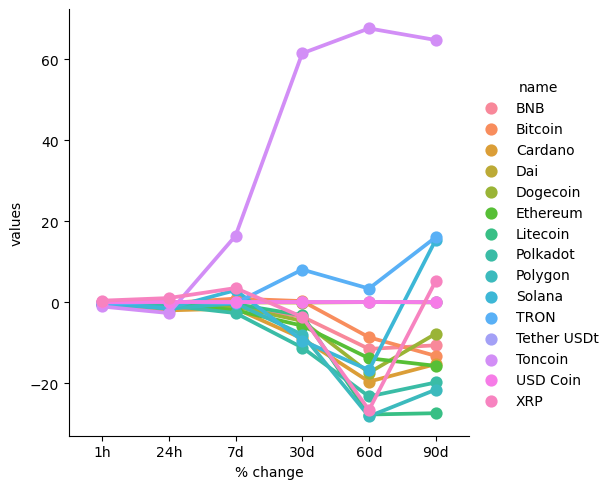

In [34]:
sns.catplot(x= '% change', y = 'values', hue = 'name', data = df7, kind = 'point') 

In [47]:
df8 = df2[['name', 'quote.USD.price', 'timestamp']]
df8

,name,quote.USD.price,timestamp
0,Bitcoin,26428.863178,2023-09-14 12:41:26.167382+00:00
1,Ethereum,1621.784110,2023-09-14 12:41:26.167382+00:00
2,Tether USDt,1.000155,2023-09-14 12:41:26.167382+00:00
3,BNB,212.069211,2023-09-14 12:41:26.167382+00:00
4,USD Coin,1.000266,2023-09-14 12:41:26.167382+00:00
5,XRP,0.482985,2023-09-14 12:41:26.167382+00:00
6,Cardano,0.248652,2023-09-14 12:41:26.167382+00:00
7,Dogecoin,0.061498,2023-09-14 12:41:26.167382+00:00
8,Solana,18.808336,2023-09-14 12:41:26.167382+00:00
9,TRON,0.082310,2023-09-14 12:41:26.167382+00:00


In [48]:
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,26428.863178,2023-09-14 12:41:26.167382+00:00
15,Bitcoin,26435.960985,2023-09-14 12:42:26.505679+00:00
30,Bitcoin,26420.529869,2023-09-14 12:43:26.840893+00:00
45,Bitcoin,26421.653554,2023-09-14 12:44:29.289399+00:00
60,Bitcoin,26421.653554,2023-09-14 12:45:29.635303+00:00
75,Bitcoin,26423.453345,2023-09-14 12:46:30.362065+00:00
90,Bitcoin,26707.295898,2023-09-18 08:29:27.621864+00:00
105,Bitcoin,26704.238404,2023-09-18 08:30:27.965433+00:00
120,Bitcoin,26703.677731,2023-09-18 08:31:28.311167+00:00
135,Bitcoin,26703.677731,2023-09-18 08:32:28.661603+00:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

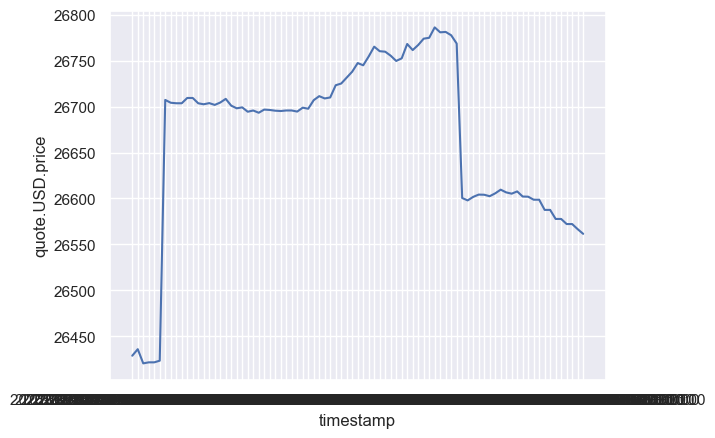

In [50]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)

In [46]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949290e+07,1.949290e+07,False,NaN,1,NaN,NaN,None,2023-09-22T17:26:00.000Z,26572.188184,1.029753e+10,-33.5278,-0.230692,-0.241067,0.850987,0.231398,-8.704459,-13.299920,5.179690e+11,49.1533,5.580160e+11,None,2023-09-22T17:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:28:07.975554+00:00
1,1027,Ethereum,ETH,ethereum,7423,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202281e+08,1.202281e+08,True,NaN,2,NaN,NaN,None,2023-09-22T17:26:00.000Z,1587.715191,3.487865e+09,-42.0357,-0.353256,-0.197891,-2.046734,-5.835763,-13.890620,-15.757400,1.908880e+11,18.1180,1.908880e+11,None,2023-09-22T17:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:28:07.975554+00:00
2,825,Tether USDt,USDT,tether,62697,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.319102e+10,8.642620e+10,True,NaN,3,NaN,NaN,None,2023-09-22T17:26:00.000Z,1.000067,1.626225e+10,-32.2464,-0.003090,0.014861,-0.000905,0.040612,0.025582,-0.056939,8.319655e+10,7.8946,8.643195e+10,None,2023-09-22T17:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-22 17:28:07.975554+00:00
3,1839,BNB,BNB,bnb,1633,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538476e+08,1.538476e+08,False,NaN,4,NaN,NaN,None,2023-09-22T17:26:00.000Z,210.011654,2.729390e+08,-39.9558,-0.350442,-0.474193,-1.099760,-3.604145,-11.578228,-10.686326,3.230979e+10,3.0659,3.230979e+10,None,2023-09-22T17:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:28:07.975554+00:00
4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,None,2023-09-22T17:26:00.000Z,0.512664,7.065179e+08,-32.2074,0.337520,0.987164,3.458245,-3.681495,-26.660745,5.190514,2.729691e+10,2.5902,5.126639e+10,None,2023-09-22T17:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:28:07.975554+00:00
5,3408,USD Coin,USDC,usd-coin,14194,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.577107e+10,2.577107e+10,False,NaN,6,NaN,NaN,None,2023-09-22T17:26:00.000Z,1.000118,2.565846e+09,-25.4110,-0.007330,0.014522,-0.002450,0.004388,0.011492,-0.005644,2.577411e+10,2.4463,2.577411e+10,None,2023-09-22T17:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-22 17:28:07.975554+00:00
6,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411133e+11,1.411133e+11,True,NaN,7,NaN,NaN,None,2023-09-22T17:26:00.000Z,0.061300,1.520896e+08,-36.0795,-0.349873,-0.565404,-1.142738,-4.664978,-17.460346,-7.819780,8.650234e+09,0.8209,8.650234e+09,None,2023-09-22T17:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:28:07.975554+00:00
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.511840e+10,3.618323e+10,False,NaN,8,NaN,NaN,None,2023-09-22T17:26:00.000Z,0.243396,1.173983e+08,-6.0628,-0.490524,-2.056803,-1.598453,-9.004611,-19.660189,-15.336791,8.547682e+09,0.8113,1.095282e+10,None,2023-09-22T17:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:28:07.975554+00:00
8,5426,Solana,SOL,solana,530,2020-04-10T00:00: